# Draft Statistical Analysis & Visualization

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/work/Include/')
import stat_process

In [ ]:
import importlib
importlib.reload(stat_process)

<module 'stat_process' from '/work/Include/stat_process.py'>

In [ ]:
df = pd.read_csv("/work/Results/Processed/GPT_Processed_Data.csv")
df

,Unnamed: 0,Start Date,End Date,Response Type,IP Address,Progress,Duration in seconds,Finished,Recorded Date,Response ID,...,convo_conversation,convo_group_id,convo_AI_turns,convo_human_turns,convo_total_turns,Perceived Motives,UTAUT Performance,UTAUT Effort,UTAUT Hedonic,self_reported_motives
0,2,2022-06-17 19:06:58,2022-06-17 19:30:44,IP Address,*******,100,1426,True,2022-06-17 19:30:44,R_3HzsyHEWtJTUPi1,...,">AI: I am Melu, a mental health companion. I ...",Caring Motive,37,36,73,Caring Motive,1361.00,1944.00,259.000000,Caring Motive
1,3,2022-06-17 19:37:24,2022-06-17 19:55:51,IP Address,*******,100,1106,True,2022-06-17 19:55:51,R_qJhnyVIDIs4CJYR,...,">AI: I am Melu, a mental health companion. I ...",No Motive,27,26,53,Caring Motive,1666.50,1666.50,222.000000,No Motive
2,4,2022-06-17 19:55:10,2022-06-17 20:10:32,IP Address,*******,100,921,True,2022-06-17 20:10:32,R_2fBsUpW2LcXQ7SP,...,">AI: I am Melu, a mental health companion. I ...",Manipulative Motive,20,19,39,Caring Motive,805.25,1666.50,110.666667,Manipulative Motive
3,5,2022-06-17 19:55:10,2022-06-17 20:10:43,IP Address,*******,100,933,True,2022-06-17 20:10:43,R_2V9McykguniYrKX,...,">AI: I am Melu, a mental health companion. I ...",Manipulative Motive,11,10,21,Caring Motive,1058.75,838.25,40.666667,Manipulative Motive
4,7,2022-06-17 20:05:37,2022-06-17 20:20:11,IP Address,*******,100,873,True,2022-06-17 20:20:11,R_2dtnelhjtaccq7c,...,">AI: I am Melu, a mental health companion. I ...",Caring Motive,17,16,33,Caring Motive,1638.75,1388.75,185.000000,Caring Motive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,178,2022-06-24 10:56:11,2022-06-24 11:11:18,IP Address,*******,100,907,True,2022-06-24 11:11:19,R_3exJwREuGMBJO1I,...,">AI: I am Melu, a mental health companion. I ...",No Motive,12,11,23,No Motive,1083.25,1138.75,148.000000,No Motive
156,179,2022-06-24 10:30:27,2022-06-24 11:12:35,IP Address,*******,100,2528,True,2022-06-24 11:12:36,R_3NRgOI3IRZLpd16,...,">AI: I am Melu, a mental health companion. I ...",No Motive,35,34,69,No Motive,1361.25,1388.50,185.000000,No Motive
157,180,2022-06-24 10:36:02,2022-06-24 11:17:17,IP Address,*******,100,2475,True,2022-06-24 11:17:18,R_2XoinwbLDyODujA,...,">AI: I am Melu, a mental health companion. I ...",Caring Motive,72,71,143,Caring Motive,1941.00,841.75,259.000000,Caring Motive
158,181,2022-06-24 10:45:31,2022-06-24 11:19:36,IP Address,*******,100,2044,True,2022-06-24 11:19:36,R_2WGOcIB0JMp3Fe4,...,">AI: I am Melu, a mental health companion. I ...",Caring Motive,4,3,7,Caring Motive,1669.25,1691.50,192.000000,Caring Motive


# ANOVA

## Strategy

Refs: 
* https://www.spss-tutorials.com/spss-one-way-anova/
* https://statisticsbyjim.com/anova/post-hoc-tests-anova/
* https://www.researchgate.net/post/Am-I-able-to-use-ANOVA-to-analyse-likert-scale-data

Steps:

1. Observations Independent? --> Yes! (Between-Subjects) 
2. Calculate the means 
3. All sample sizes > 25? --> No! 
4. Normality Assumption Met? --> Yes!
5. Sample Sizes (Roughly) Equal? --> No 
6. Homogeneity Assumption Met? --> ?  Yes!
7. ANOVA (Basic ANOVA or ANOVA with Welch statistic?) --> Basic ANOVA (Omnibus test)

Interpretation:

Null: All group means are equal.
Alternative: Not all group means are equal.

If the p-value from your ANOVA F-test or Welch’s test is less than your significance level, you can reject the null hypothesis.


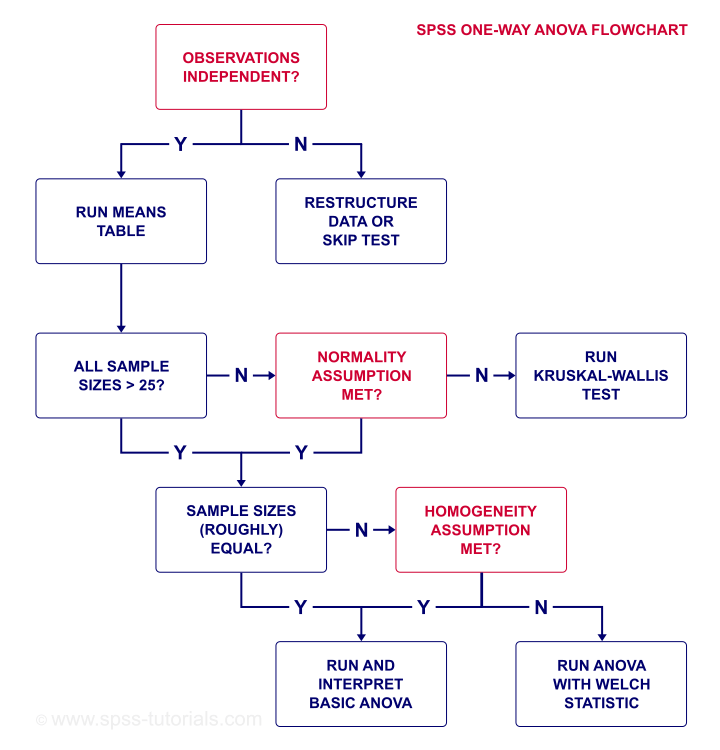

## Explanation of Descriptive Statistics for ANOVA
Ref: Degrees of Freedom for ANOVA
http://www.rondotsch.nl/degrees-of-freedom/ 

In [ ]:
def StatTest(data, ivar, dvar, conditions_list):

    # print(data_dict)
    if stat_process.isMinSampleSize_grps(data, ivar):
        # check sample sizes roughly equal
        print('[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.') 
        print ('---------------------------------------------')
    else: 
        print ('[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.')
        print ('---------------------------------------------')
        if stat_process.isNormal(datalist):
            print('[StatTest] Normality Assumption was met. Check if sample sizes are roughly equal.')
            print ('---------------------------------------------')
            if stat_process.isEqualVariances(datalist):
                print('[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.')
                print ('---------------------------------------------')
                if stat_process.passesBasicAnova(datalist):
                    print('[StatTest] Basic ANOVA found significance. Run Tukey post-hoc test.')
                    print ('---------------------------------------------')
                    TukeyTest(datalist)
                else:
                    print("[StatTest] Tukey found NO statistically significance found between groups.")
            else: 
                print('[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.')
                if stat_process.passesAnovaWelch(datalist):
                    print('[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.')
                    print ('---------------------------------------------')
                    stat_process.TukeyTest(datalist)
                else:
                    print("[StatTest] Tukey found NO statistically significance found between groups.")
        else:
            print ('[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test')
            print ('---------------------------------------------')
            stat_process.Kruskal_Wallis_Test(data_dict, ivar)

In [ ]:
def getDataList(data, ivar, dvar, conditions_list):
    datalist = []
    for grp in conditions_list:
        df_grp = data.loc[data[ivar] == grp][dvar].to_numpy()
        datalist.append((grp,df_grp))
    return datalist

In [ ]:
#Normality Tests
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

# null hypothesis: sample come from a normal distribution ~ i.e. Normal
# rejecting the null hypothesis means it is NOT normal

# Logic 
# Null hypothesis: Data follows a normal distribution
# alternatie hypothesis: Data do not follow a normal distribution 

# If p<0.05, NOT normal, reject null hypothesis 
# If p>0.05, ARE normal distributions, fail to reject null hypothesis

def isNormal(datalist, debug = True, type = "Shapiro"):

    if type == "Shapiro":
        print("Performing Shapiro-Wilk normality test...")
        alpha = 0.05
        print(f"alpha_value: {alpha}")

        flag = True
        for dt in datalist:
            grp = dt[0]
            series = dt[1]
            shapiro_test = stats.shapiro(series)
            print(shapiro_test)
            p = shapiro_test[1]
            w = shapiro_test[0]
            if p < alpha:
                if debug:
                    print(f"Series {grp}: is NOT normal. W:{w}, Pvalue: {p}")
                flag = False
            else:
                if debug:
                    print(f"Series {grp}: IS normal. W:{w}, Pvalue: {p}")
        if debug:
            print(f"Normality Assumption Met? : {flag}")
        return flag

    else:  # D’Agostino and Pearson’s Normality Test
        print("Performing D'Agostino-Pearson's normality test...")
        flag = True
        # alpha = 1e-3 #0.001
        alpha = 0.05
        print(f"alpha_value: {alpha}")

        for dt in datalist:
            grp = dt[0]
            series = dt[1]
            k2, p = stats.normaltest(series)
            if p < alpha:
                if debug:
                    print(f"Series {grp}: is NOT normal. Pvalue: {p}")
                flag = False
            else:
                if debug:
                    print(f"Series {grp}: IS normal. Pvalue: {p}")
        if debug:
            print(f"Normality Assumption Met? : {flag}")
        return flag

In [ ]:
dvar = "Agent: The motive statement influenced your perception"
conditions_list = ["No Motive", "Manipulative Motive", "Caring Motive"]

datalist = stat_process.getDataList(df, "assigned_group", dvar, conditions_list)

In [ ]:
isNormal(datalist)

Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.9034315347671509, pvalue=0.00037289041210897267)
Series No Motive: is NOT normal. W:0.9034315347671509, Pvalue: 0.00037289041210897267
ShapiroResult(statistic=0.9140657782554626, pvalue=0.001138682127930224)
Series Manipulative Motive: is NOT normal. W:0.9140657782554626, Pvalue: 0.001138682127930224
ShapiroResult(statistic=0.9107479453086853, pvalue=0.0006791099440306425)
Series Caring Motive: is NOT normal. W:0.9107479453086853, Pvalue: 0.0006791099440306425
Normality Assumption Met? : False


False

In [ ]:
# Check Unequal Sample Sizes
# Check the equality of variances for a variable
# Ref: https://stats.stackexchange.com/questions/135232/bartletts-test-vs-levenes-test
# Ref: https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.
# Bartlett's test is sensitive to departures from normality. That is, if your samples come from non-normal distributions, then Bartlett's test may simply be testing for non-normality.
# The Levene test is an alternative to the Bartlett test that is less sensitive to departures from normality.

# Logic
# Null hypothesis : all samples are from populations with equal variances

def isEqualVariances(datalist, isVeryNotNormal=True):
    print("Performing Equal Variances Test...")
    if isVeryNotNormal:
        return LeveneTest(datalist)
    else:
        return BartlettTest(datalist)


def LeveneTest(datalist):
    print("Performing Levene Test...")
    args = [sr[1]
            for sr in datalist]  # this returns a list of series

    levene_result = stats.levene(*args)  # [0] statistic, [1] pvalue
    print("homogeneity test:", levene_result)
    if levene_result[1] < 0.05:
        print(f"The populations do NOT have equal variances.")
        return False
    else:
        print(f"The populations have equal variances.")
        return True


# There are significant deviations from normality, use
# Null hypothesis is that each group has the same variance
# Ref: https://www.statology.org/welchs-anova-in-python/
def BartlettTest(datalist):
    print("Performing Bartlett Test of Homogeneity of Variances...")
    args = [sr[1]
            for sr in datalist]  # this returns a list of series
    bartlett_result = stats.bartlett(*args)
    print("Result:", bartlett_result)
    if bartlett_result[1] < 0.05:
        print(f"The populations do NOT have equal variances.")
        return False
    else:
        print(f"The populations have equal variances.")
        return True


def passesBasicAnova(datalist):
    print("Performing ANOVA")
    args = [sr[1] for sr in datalist]  # this returns a list of series
    anova = stats.f_oneway(*args)  # [0] statistic, [1] pvalue
    print(anova)
    if anova[1] < 0.05:
        print(
            "ANOVA found signifance. At least one of the means of the groups is different.")
        return True
    else:
        print("oneway ANOVA: no significance. No significant difference between means of the groups.")
        return False
    # return anova


In [ ]:
passesBasicAnova(datalist)

Performing ANOVA
F_onewayResult(statistic=4.018923658971343, pvalue=0.01985244581062491)
ANOVA found signifance. At least one of the means of the groups is different.


True

In [ ]:
def TukeyTest(datalist):
    print("Performing Tukey Post-Hoc Test...")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    long_table = stat_process.getLongTable(datalist)
    
    tukey = pairwise_tukeyhsd(endog=long_table['Data'].to_numpy(), groups=long_table['Condition'], alpha=0.05)
    print(tukey)

In [ ]:
TukeyTest(datalist)

Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive Manipulative Motive   -0.401 0.4764  -1.216   0.414  False
      Caring Motive           No Motive   -0.963 0.0148 -1.7703 -0.1556   True
Manipulative Motive           No Motive   -0.562 0.2355  -1.377  0.2531  False
------------------------------------------------------------------------------


In [ ]:
# Create Tables: Wide and Long Format

def getLongTable(datalist):
    series = [sr[1].tolist() for sr in datalist] 
    grps = [sr[0] for sr in datalist]

    alldata = []
    allgrps = []

    for grp, data in datalist: 
        allgrps.extend([grp] * len(data))
        alldata.extend(data)

    table_df = pd.DataFrame(list(zip(allgrps, alldata)), 
                       columns = ['Condition', 'Data'])
    
    return table_df


In [ ]:
def passesAnovaWelch(datalist, var_equal=False):
    import scipy
    from collections import namedtuple
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    args = [sr[1] for sr in datalist]  # this returns a list of series

    F_onewayResult = namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg, ddof=1) for arg in args])
    wi = ni/vi

    tmp = sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 - 1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) / ((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = scipy.special.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf

    print(F_onewayResult(f, prob))
    if prob < 0.05:
        print("ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.")
        return True
    else:
        print("ANOVA with Welch Statistic: NO significance. No significant difference between means of the groups.")
        return False

    # return F_onewayResult(f, prob)


In [ ]:
passesAnovaWelch(datalist)

F_onewayResult(statistic=3.973289850889706, pvalue=0.02172778453172414)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.


True

In [ ]:
# Krukal Wallis Test by Condition
# Reference (KW): https://data.library.virginia.edu/getting-started-with-the-kruskal-wallis-test/#:~:text=If%20we%20have%20a%20small,different%20distribution%20than%20the%20others.
# Reference(KW): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# Reference (Dunn): https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/
# Reference (Dunn) Interpretation: https://www.statology.org/dunns-test-python/

# Logic
# If p>0.05, we cannot reject the null hypothesis. The samples come from the same distirbution, therefore there is no significant difference between the groups.
# If p<0.05, we can reject the null hypothesis. There is a significant difference between the groups.

def Kruskal_Wallis_Test(datalist, alpha=0.05, debug=True):

    import scikit_posthocs as sp
    import itertools

    flag = True
    # alpha = 5e-2 #0.05
    print(f"alpha: {alpha}")

    args = [sr[1] for sr in datalist]  # this returns a list of series
    grps = [sr[0] for sr in datalist]  # list of experimental groups

    # for key in data_dict:
    #   print(key)

    # RUN KW Test
    # Inputs are *individual series, one for each category
    kw_result = stats.kruskal(*args)
    statistic = kw_result[0]
    pvalue = kw_result[1]
    if debug:
        print(kw_result)

    flag = False
    if pvalue < alpha:  # KW returns significant result
        print("Significant Result for Kruskal Wallis. Therefore we compute the DUNN post-hoc test.")
        dunn = sp.posthoc_dunn(args, p_adjust='bonferroni')

        if debug:
            print(f"{dunn}")
            # print(dunn[1])
            # print(dunn[1][4])
            # print(len(dunn))

        # Print Significance Results for Dunn
        print("Pairwise Dunn P-Values:")
        conds = np.arange(1, len(dunn)+1, 1)
        combs = list(itertools.combinations(conds, 2))

        for i in combs:
            if dunn[i[0]][i[1]] <= 0.001:
                print(
                    f"{i}: {grps[i[0]-1]}-{grps[i[1]-1]} : pvalue = {dunn[i[0]][i[1]]} : SIGNIFICANT (***)")
                flag = True
            elif dunn[i[0]][i[1]] <= 0.01:
                print(
                    f"{i}: {grps[i[0]-1]}-{grps[i[1]-1]} : pvalue = {dunn[i[0]][i[1]]} : SIGNIFICANT (**)")
                flag = True
            elif dunn[i[0]][i[1]] <= alpha:
                print(
                    f"{i}: {grps[i[0]-1]}-{grps[i[1]-1]} : pvalue = {dunn[i[0]][i[1]]} : SIGNIFICANT (*)")
                flag = True
            else:
                # print(f"{i}: {grps[i[0]]}-{grps[i[1]]} : pvalue = {dunn[i[0]][i[1]]} : not significant")
                pass
        

    else:
        print("No significant result for Kruskal Wallis. No DUNN post-hoc test.")

    return flag


In [ ]:
Kruskal_Wallis_Test(datalist)

alpha: 0.05
KruskalResult(statistic=8.343702568319806, pvalue=0.01542368006257743)
Significant Result for Kruskal Wallis. Therefore we compute the DUNN post-hoc test.
          1         2         3
1  1.000000  0.245325  0.012522
2  0.245325  1.000000  0.817821
3  0.012522  0.817821  1.000000
Pairwise Dunn P-Values:
(1, 3): No Motive-Caring Motive : pvalue = 0.012521646113215958 : SIGNIFICANT (*)


True

In [ ]:
stat_process.StatTest(df, "assigned_group", dvar, conditions_list)

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.5297765644419269, pvalue=0.5897851840590602)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=4.018923658971343, pvalue=0.01985244581062491)
ANOVA found signifance. At least one of the means of the groups is different.
[StatTest] Basic ANOVA found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive M

(0.01985244581062491, 'basic ANOVA, Tukey posthoc')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f3ea62d-9e62-461e-8c65-1caf654509ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>